In [2]:
#import modules
import pandas as pd
import numpy as np

In [3]:
#import data from CSV I created in excel
df = pd.read_csv('lyft week data.csv')

In [4]:
#Remove extra columns
df = df.drop(columns=["Unnamed: 9","Unnamed: 10","Unnamed: 11","Unnamed: 12","Unnamed: 13","Unnamed: 14","Unnamed: 15","Unnamed: 16","Unnamed: 17","Unnamed: 18","Unnamed: 19","Unnamed: 20"])

In [5]:
#Filter the dataframe so there are no adjustments included
rdf = df[df['Date'] != "Adjustment"]

In [6]:
#display head for visual verification
rdf.head()

,Date,Total Earnings,Base Earning,Tip,Bonus,Wait Pay,Passenger Pay,Lyft Fees,External Fees
0,9/9/2025,6.24,4.75,0.0,1.42,0.07,9.99,2.61,1.14
1,9/9/2025,7.16,5.97,0.0,1.19,0.00,13.60,4.47,1.97
2,9/9/2025,7.05,5.88,0.0,1.17,0.00,9.99,1.73,1.21
3,9/9/2025,7.16,5.51,0.0,1.65,0.00,16.71,5.03,4.52
4,9/9/2025,9.22,4.64,0.0,1.39,0.19,10.96,0.54,1.20


In [20]:
#Create sums of each column to have totals of each attribute
''' I did on multiple lines to not affect the format of the date'''

my_earnings = rdf['Total Earnings'].sum().round(2)
pass_pay = rdf['Passenger Pay'].sum().round(2)
tips = rdf['Tip'].sum().round(2)
bonuses = rdf['Bonus'].sum().round(2)
wait_pay = rdf['Wait Pay'].sum().round(2)
lyft_fees = rdf['Lyft Fees'].sum().round(2)
ext_fees = rdf['External Fees'].sum().round(2)
base_earning = rdf['Base Earning'].sum().round(2)

#Print out each oof my values labeled neatly
print('This Weeks Statistics')
print('My Total earnings:', my_earnings)
print('Total Passenger payment :', pass_pay)
print('Total Tips:', tips)
print('Total Bonuses:', bonuses)
print('Total wait pay:', wait_pay)
print('Total Lyft Fees:', lyft_fees)
print('Total External Fees:', ext_fees)
print('Total base earnings:', base_earning)
#add adjustments
print('Total Adjustments:', tot_adj)


This Weeks Statistics
My Total earnings: 133.62
Total Passenger payment : 200.62
Total Tips: 7.5
Total Bonuses: 24.08
Total wait pay: 0.92
Total Lyft Fees: 48.04
Total External Fees: 26.46
Total base earnings: 98.12
Total Adjustments: 15.25


In [8]:
predictedbasepay = pass_pay - tips - lyft_fees - ext_fees - bonuses - wait_pay
print(predictedbasepay)

93.62


In [9]:
print(base_earning - predictedbasepay)

4.5


In [10]:
adf = df[df['Date'] == "Adjustment"]
tot_adj = adf['Total Earnings'].sum().round(2)
adf

,Date,Total Earnings,Base Earning,Tip,Bonus,Wait Pay,Passenger Pay,Lyft Fees,External Fees
9,Adjustment,2.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,Adjustment,9.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,Adjustment,2.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
print(tot_adj)

15.25


In [12]:
print('Seventy percent of all passenger payments is', .70 * pass_pay)

Seventy percent of all passenger payments is 140.434


In [13]:
#Passenger payments with lyft fees and external fees deducted. I am gaurenteed 100% tips so those will be 
#deducted here as well as bonuses and wait pay
pay_after_ded = pass_pay - lyft_fees - ext_fees + tips + bonuses + wait_pay
print('Seventy percent of passenger payments after Lyft and External Fees are Deducted', .70 * pay_after_ded)
mine = .70 * pay_after_ded

Seventy percent of passenger payments after Lyft and External Fees are Deducted 111.03399999999998


In [14]:
comparison = my_earnings - tips 
print(comparison)

126.12


In [15]:
predicted_adj = comparison - mine
print(predicted_adj)

15.086000000000027


In [16]:
print(tot_adj - predicted_adj)

0.16399999999997306


In [33]:
error = (predicted_adj / tot_adj)

In [34]:
print('my calculations have an error of', error, '% Accurate this week.')
print('70% of passenger payments after lyft fees was', mine.round(2))
print('my total earnings NOT INCLUDING Tips was', my_earnings - tips)

my calculations have an error of 0.989245901639346 % Accurate this week.
70% of passenger payments after lyft fees was 111.03
my total earnings NOT INCLUDING Tips was 126.12


In [30]:
#define a "before adjustment" percentage. This is the % of customer payment i recieved before adjustments
BA_percent = ((my_earnings - tips) / pass_pay).round(2)
print('I made',BA_percent,'of passenger payments before being paid adjustments')

I made 0.63 of passenger payments before being paid adjustments


In [32]:
#define a "After adjustment" percentage. This is the % of customer payment i recieved after adjustments
AA_percent = ((my_earnings - tips + tot_adj) / pass_pay)
print('I made',AA_percent,'of passenger payments before being paid adjustments')

I made 0.704665536835809 of passenger payments before being paid adjustments


In [35]:
import matplotlib .pyplot as plt

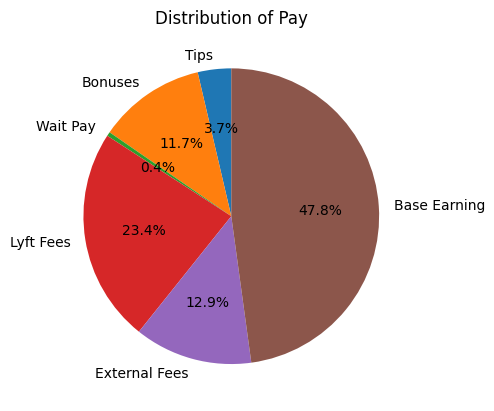

In [36]:
#create a list of components to visualize
components = {
    "Tips": rdf['Tip'].sum().round(2),
    "Bonuses": rdf['Bonus'].sum().round(2),
    "Wait Pay": rdf['Wait Pay'].sum().round(2),
    "Lyft Fees": rdf['Lyft Fees'].sum().round(2),
    "External Fees": rdf['External Fees'].sum().round(2),
    "Base Earning": rdf['Base Earning'].sum().round(2)
}

# Create pie chart
plt.pie(components.values(), labels = components.keys(), autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Pay")
plt.show()